# Data Preparation

The purpose of this notebook is to split the dataframes so that the classes in the training dataframe are similarly distributed.
An almost 100% balance is unfortunately not possible. Furthermore, the splits are visualized.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import statements

import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
rootdir = '/content/drive/MyDrive/data'
output_imgs = '/content/drive/MyDrive/outputs/imgs'

In [ ]:
df = pd.read_csv(os.path.join(rootdir, 'annotations.csv'))
df.head()

,folder,filename,width,height,depth,segmented,name,pose,truncated,difficult,xmin,ymin,xmax,ymax
0,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,999,1084,1434,1496
1,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,1540,1071,2003,1502
2,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,687,1515,1168,1968
3,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,1309,1552,1768,1993
4,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,1899,1549,2381,2006


In [ ]:
def flatten(t):
  return [item for sublist in t for item in sublist]

The splits are set so that all coins occur approximately equally in the workout

In [ ]:
train_1, test_1 = train_test_split(df[df['folder'] == '1']['filename'].unique(), test_size=0.3)
train_2, test_2 = train_test_split(df[df['folder'] == '2']['filename'].unique(), test_size=0.3)
train_5, test_5 = train_test_split(df[df['folder'] == '5']['filename'].unique(), test_size=0.3)
train_10, test_10 = train_test_split(df[df['folder'] == '10']['filename'].unique(), test_size=0.3)
train_20, test_20 = train_test_split(df[df['folder'] == '20']['filename'].unique(), test_size=0.0001)
train_50, test_50 = train_test_split(df[df['folder'] == '50']['filename'].unique(), test_size=0.0001)
train_100, test_100 = train_test_split(df[df['folder'] == '100']['filename'].unique(), test_size=0.0001)
train_200, test_200 = train_test_split(df[df['folder'] == '200']['filename'].unique(), test_size=0.0001)
train_mixed, test_mixed = train_test_split(df[df['folder'] == 'mixed']['filename'].unique(), test_size=0.025)
train_own, test_own = train_test_split(df[df['folder'] == 'own']['filename'].unique(), test_size=0.3)
train_images, test_images = train_test_split(df[df['folder'] == 'images']['filename'].unique(), test_size=0.05)

df_train = df[df['filename'].isin(flatten([train_1, train_2, train_5, train_10, train_20, train_50, train_100, train_200, train_mixed, train_own, train_images]))]
df_test = df[df['filename'].isin(flatten([test_1, test_2, test_5, test_10, test_20, test_50, test_100, test_200, test_mixed, test_own, test_images]))]

### Tests to check if split didn't cause any side effects

In [ ]:
assert len(df[df['filename'].isin(flatten([train_1, train_2]))]['filename'].unique()) == (len(train_1) + len(train_2))

In [ ]:
assert (len(df_train) + len(df_test)) == len(df)

In [ ]:
assert (len(train_mixed) + len(test_mixed)) == len(df[df['folder'] == 'mixed']['filename'].unique())

## Normal dataframe

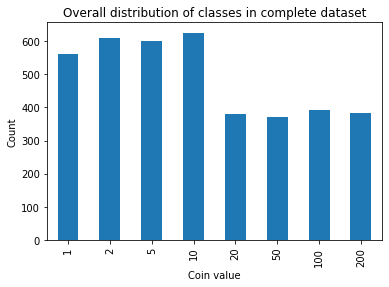

In [ ]:
ax = df['pose'].value_counts().sort_index().plot(kind = 'bar', title = 'Overall distribution of classes in complete dataset', ylabel = 'Count', xlabel = 'Coin value')

## Train dataframe

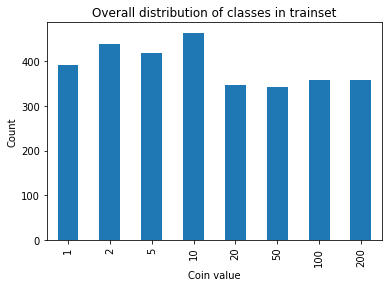

In [ ]:
ax = df_train['pose'].value_counts().sort_index().plot(kind = 'bar', title = 'Overall distribution of classes in trainset', ylabel = 'Count', xlabel = 'Coin value')
ax.figure.savefig(os.path.join(output_imgs, 'overall_distribution_of_classes_train.png'))

## Test dataframe

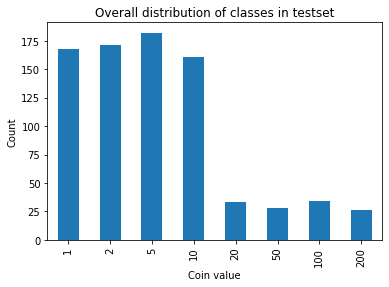

In [ ]:
ax = df_test['pose'].value_counts().sort_index().plot(kind = 'bar', title = 'Overall distribution of classes in testset', ylabel = 'Count', xlabel = 'Coin value')
ax.figure.savefig(os.path.join(output_imgs, 'overall_distribution_of_classes_test.pdf'))

In [ ]:
# Save dataframes as csv file
df_train.to_csv(os.path.join(rootdir, 'train.csv'), index = False)
df_test.to_csv(os.path.join(rootdir, 'test.csv'), index = False)